# Continuous Probabalistic Methods | `Exercises`

In [28]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

## 1a. Identify lower outliers
Use the **IQR Range Rule** and the upper and lower bounds to identify the lower outliers of each column of `lemonade.csv`, using the multiplier of 1.5. 
- Do these lower outliers make sense? 
- Which outliers should be kept?

In [5]:
# importing data from url and reading to pandas df
url = 'https://gist.githubusercontent.com/ryanorsinger/19bc7eccd6279661bd13307026628ace/raw/e4b5d6787015a4782f96cad6d1d62a8bdbac54c7/lemonade.csv'

df = pd.read_csv(url)

In [6]:
# previewing df
df.head()

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         365 non-null    object 
 1   Day          365 non-null    object 
 2   Temperature  365 non-null    float64
 3   Rainfall     365 non-null    float64
 4   Flyers       365 non-null    int64  
 5   Price        365 non-null    float64
 6   Sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


>DataFrame of mixed dtypes

In [8]:
# lower quantile range for numeric columns
df.quantile(.25)

Temperature    49.70
Rainfall        0.65
Flyers         31.00
Price           0.50
Sales          20.00
Name: 0.25, dtype: float64

In [10]:
# upper quantile range for numeric columns
df.quantile(.75)

Temperature    71.70
Rainfall        0.91
Flyers         49.00
Price           0.50
Sales          30.00
Name: 0.75, dtype: float64

In [11]:
# running a for loop that will loop through each column and print all integer and float dtype columns
for col in df:
    if (df[col].dtype =='int') | (df[col].dtype == 'float'):
        print(col)

Temperature
Rainfall
Flyers
Price
Sales


In [12]:
# saving multiplier to var
multiplier = 1.5

In [13]:
# saving the q1 values for each column
q1_temp = df.Temperature.quantile(.25)
q1_rain = df.Rainfall.quantile(.25)
q1_flyer = df.Flyers.quantile(.25)
q1_price = df.Price.quantile(.25)
q1_sales = df.Sales.quantile(.25)

# savings the q3 values for each column
q3_temp = df.Temperature.quantile(.75)
q3_rain = df.Rainfall.quantile(.75)
q3_flyer = df.Flyers.quantile(.75)
q3_price = df.Price.quantile(.75)
q3_sales = df.Sales.quantile(.75)

# calculating and saving the iqr for each column
iqr_temp = q3_temp - q1_temp
iqr_rain = q3_rain - q1_rain
iqr_flyer = q3_flyer - q1_flyer
iqr_price = q3_price - q1_price
iqr_sales = q3_sales - q1_sales

In [14]:
# calculating lower fences
inner_lower_fence_temp = q1_temp - (multiplier * iqr_temp)
inner_lower_fence_rain = q1_rain - (multiplier * iqr_rain)
inner_lower_fence_flyer = q1_flyer - (multiplier * iqr_flyer)
inner_lower_fence_price = q1_price - (multiplier * iqr_price)
inner_lower_fence_sales = q1_sales - (multiplier * iqr_sales)

#### Lower outliers of each column based on IQR rule...

In [31]:
# creating a function that plots a boxplot
def boxplot(series):
    '''
THIS FUNCTION TAKES IN A SERIES OF VALUES AND PLOTS A HORIZONTAL BOXPLOT.
    '''
    
    sns.boxplot(series)
    plt.show();

In [32]:
# Temperature lower outliers
df[df.Temperature < inner_lower_fence_temp]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.5,9,0.5,7


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


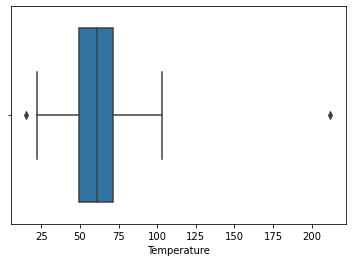

In [33]:
boxplot(df.Temperature)

>#### A 15 degree temperature is pretty cold but, because it is in the month of December and still pretty close to the fence, not sure if it makes sense to discard this as an outlier.

In [19]:
# Rainfall
df[df.Rainfall < inner_lower_fence_rain]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


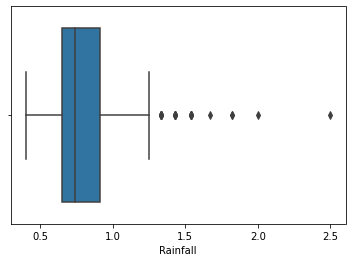

In [34]:
boxplot(df.Rainfall)

>#### No outliers for rainfall based on IQR rule. The data looks to be skewed right so this makes sense.

In [17]:
# Flyers
df[df.Flyers < inner_lower_fence_flyer]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
324,11/21/17,Tuesday,47.0,0.95,-38,0.5,20


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


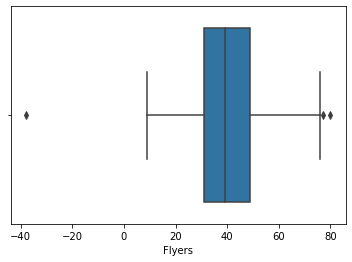

In [35]:
boxplot(df.Flyers)

>#### I do not see how you could have a negative value for `Flyers` so this makse sense as an outlier.

In [20]:
# Price
df[df.Price < inner_lower_fence_price]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


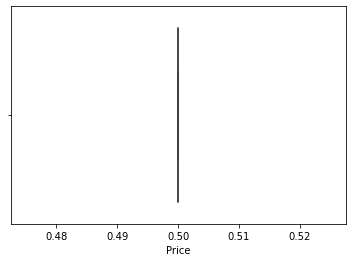

In [36]:
boxplot(df.Price)

In [37]:
# single value for Price, looking at the value counts
df.Price.value_counts()

0.5    365
Name: Price, dtype: int64

>#### Each value in this column is the same so no outliers makes sense here.

In [21]:
# Sales
df [df.Sales < inner_lower_fence_sales]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


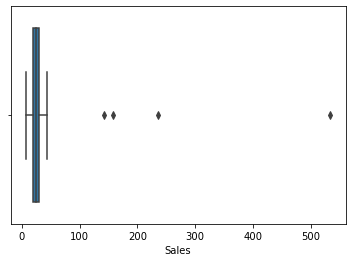

In [38]:
boxplot(df.Sales)

>#### This column is heavily skewed right so it makes sense that there are now lower fence outliers here.

## 1b. Identify upper outliers
Use the **IQR Range Rule** and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. 
- Do these upper outliers make sense? 
- Which outliers should be kept?

In [ ]:
# calculating upper fence values
inner_lower_fence_temp = q1_temp - (multiplier * iqr_temp)
inner_lower_fence_rain = q1_rain - (multiplier * iqr_rain)
inner_lower_fence_flyer = q1_flyer - (multiplier * iqr_flyer)
inner_lower_fence_price = q1_price - (multiplier * iqr_price)
inner_lower_fence_sales = q1_sales - (multiplier * iqr_sales)

## 1c. Lower bound outliers
Using the **multiplier of 3, IQR Range Rule**, and **the lower bounds**, identify the outliers below the lower bound in each colum of `lemonade.csv`. 
- Do these lower outliers make sense? 
- Which outliers should be kept?

## 1d. Upper bound outliers
Using the **multiplier of 3, IQR Range Rule**, and **the upper bounds**, identify the outliers above the upper_bound in each colum of `lemonade.csv`. 
- Do these upper outliers make sense? 
- Which outliers should be kept?